In [1]:
using Intervalos

#[1]
#### ¿Cuál sería una definición matemática razonable de un intervalo multi-dimensional?

Podríamos hacer un arreglo de intervalos, de modo que si tenemos `N` dimensiones entonces trabajemos con un vector de `N` entradas donde cada entrada es un objeto tipo `Intervalo`

#[2]
#### ¿Cómo podríamos expresar esto en Julia? Da dos posibilidades.

##### [Pista: Checa typealias]


MÉTODO #1

Una opción es definir un nuevo tipo que sea un arreglo de intervalos

In [2]:
type IntervalDim{N}
    a::Vector{Intervalo} #Array{Intervalo,1}
    IntervalDim(a) = ( length(a)==int(N) ? new(a) : error("Error de dimensión"))
end


Base.show(io::IO, a::IntervalDim) = print(io::IO, "IntervalDim{$(length(a.a))}
$(a.a)");

In [3]:
IntervalDim{3}([Intervalo(1,2),Intervalo(1,1)])

LoadError: Error de dimensión
while loading In[3], in expression starting on line 1

In [4]:
IntervalDim{2}([Intervalo(1,2),Intervalo(1,1)])

IntervalDim{2}
[[1e+00,
2e+00],[1e+00,
1e+00]]

Como vamos a trabajar normalmente con $\mathbb{R}^2$ voy a definir uno por 'default' de dimensión dos.

In [5]:
IntervalDim(a::Array{Intervalo,1})=IntervalDim{2}(a::Array{Intervalo,1})

IntervalDim{N} (constructor with 1 method)

In [6]:
vect1=IntervalDim([Intervalo(1,2),Intervalo(1,1)])

IntervalDim{2}
[[1e+00,
2e+00],[1e+00,
1e+00]]

# 
MÉTODO #2

Otra opción es utilizar el hint (typealias):

In [7]:
typealias IntervalD{} Vector{Intervalo}

Array{Intervalo,1}

In [8]:
typeof([Intervalo(0,1),Intervalo(2,3)])==IntervalD{}

true

De modo que tenemos que definir los arreglos de intervalos de la manera usual pero podemos hacer referencia a su tipo utilizando `IntervalD`.

Por ejemplo:

In [9]:
function algo(c::IntervalD,b::Intervalo)
    c[1]=b
    c
end

algo([Intervalo(0,1),Intervalo(2,3)]  ,  Intervalo(5,5))

2-element Array{Intervalo,1}:
 [5e+00,
5e+00]
 [2e+00,
3e+00]

También puedo definir una función que me genere elementos de tamaño `n` de ese tipo:

In [10]:
intervalD(n::Int64) = Array(Intervalo,n)
intervalD()=intervalD(2)

asdf=intervalD() #este es un arreglo 'vacío' de dos elementos
if typeof(asdf)==IntervalD
    println(asdf)
end

[#undef,#undef]


#[3]
#### ¿Cuáles operaciones matemáticas necesitaremos definir sobre los intervalos multi-dimensionales? Impleméntalos en un módulo. ¿Cuál de las dos definiciones resulta más útil en ese respecto?

MÉTODO #1

Pues si utilizamos el primero tenemos que definir TODAS las operaciones, aunque la definición es fácil ya que solo debemos hacer:

In [11]:
function definidorDim!(f::Function)
    f(x::IntervalDim,y::IntervalDim)=f(x.a,y.a)
end

definidorDim! (generic function with 1 method)

In [12]:
definidorDim!(+)
definidorDim!(-)
definidorDim!(.*)
definidorDim!(./)
definidorDim!(⋅)

dot (generic function with 8 methods)

In [13]:
vect1=IntervalDim([Intervalo(1,2),Intervalo(1,1)])
vect2=IntervalDim([Intervalo(0,1),Intervalo(2,3)])

#println(vect1+vect2)
#println(vect2-vect1)
println(vect1.*vect2)
#println(vect2./vect1)
#println(vect1⋅vect2)

[[0e+00,
2e+00],[2e+00,
3e+00]]


# 
MÉTODO #2

No tenemos que definir operaciones ya que ya estan definidas las operaciones entre vectores

In [14]:
vect1=[Intervalo(1,2),Intervalo(1,1)]
vect2=[Intervalo(0,1),Intervalo(2,3)]

#println(vect1+vect2)
#println(vect2-vect1)
#println(vect1.*vect2)
#println(vect2./vect1)
println(vect1⋅vect2)

[2e+00,
5e+00]


#[4]
#### Considera la función $f:\mathbb{R}^2→\mathbb{R}^2$, dada por $f(x,y)=\mathsf{M}⋅\mathbf{x}$, con $\mathsf{M} =\begin{pmatrix}
2 & 1 \\
1 & 1
\end{pmatrix}.$

#### (i) Encuentra a mano la imagen del cuadrado unitario. Encuentra el intervalo multi-dimensional más pequeño que contiene este conjunto.

In [15]:
using PyPlot

INFO: Loading help data...


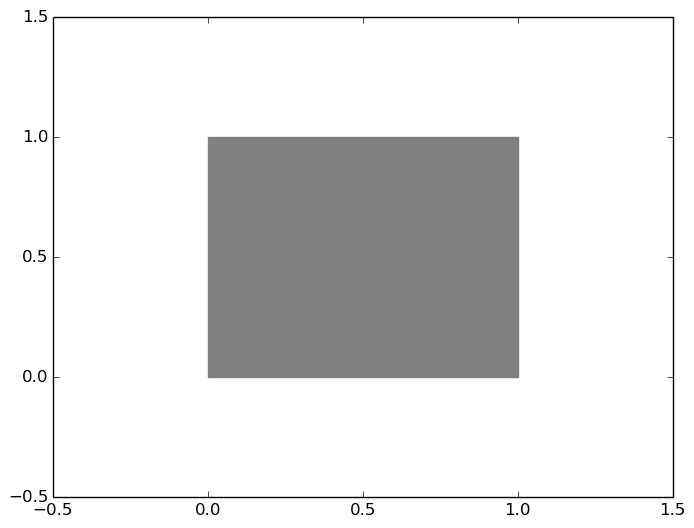

In [16]:
#El cuadrado unitario está dado por:
PyPlot.fill_between([0,1],0,1,color="gray")
PyPlot.xlim(-0.5,1.5)
PyPlot.ylim(-0.5,1.5);

Veamos a donde manda algunos puntos:

In [17]:
mat=[[2,1] [1,1]]

2x2 Array{Int64,2}:
 2  1
 1  1

In [18]:
x=([0,0],[0,1/4],[0,1/2],[0,3/4],[0,1])
for i=1:length(x)
    println("$(x[i]) → ",mat*x[i])
end;
println("La recta que une [0,0] y [0,1] se va a una recta que une [0,0] y [1,1]")
println()
x=([0,0],[1/4,0],[1/2,0],[3/4,0],[1,0])
for i=1:length(x)
    println("$(x[i]) → ",mat*x[i])
end;
println("La recta que une [0,0] y [1,0] se va a una recta que une [0,0] y [2,1]")
println()
x=([0,1],[1/4,1],[1/2,1],[3/4,1],[1,1])
for i=1:length(x)
    println("$(x[i]) → ",mat*x[i])
end;
println("La recta que une [0,1] y [1,1] se va a una recta que une [1,1] y [3,2]")
println()
x=([1,0],[1,1/4],[1,1/2],[1,3/4],[1,1])
for i=1:length(x)
    println("$(x[i]) → ",mat*x[i])
end;
println("La recta que une [1,0] y [1,1] se va a una recta que une [2,1] y [3,2]")

[0,0] → [0,0]
[0.0,0.25] → [0.25,0.25]
[0.0,0.5] → [0.5,0.5]
[0.0,0.75] → [0.75,0.75]
[0,1] → [1,1]
La recta que une [0,0] y [0,1] se va a una recta que une [0,0] y [1,1]

[0,0] → [0,0]
[0.25,0.0] → [0.5,0.25]
[0.5,0.0] → [1.0,0.5]
[0.75,0.0] → [1.5,0.75]
[1,0] → [2,1]
La recta que une [0,0] y [1,0] se va a una recta que une [0,0] y [2,1]

[0,1] → [1,1]
[0.25,1.0] → [1.5,1.25]
[0.5,1.0] → [2.0,1.5]
[0.75,1.0] → [2.5,1.75]
[1,1] → [3,2]
La recta que une [0,1] y [1,1] se va a una recta que une [1,1] y [3,2]

[1,0] → [2,1]
[1.0,0.25] → [2.25,1.25]
[1.0,0.5] → [2.5,1.5]
[1.0,0.75] → [2.75,1.75]
[1,1] → [3,2]
La recta que une [1,0] y [1,1] se va a una recta que une [2,1] y [3,2]


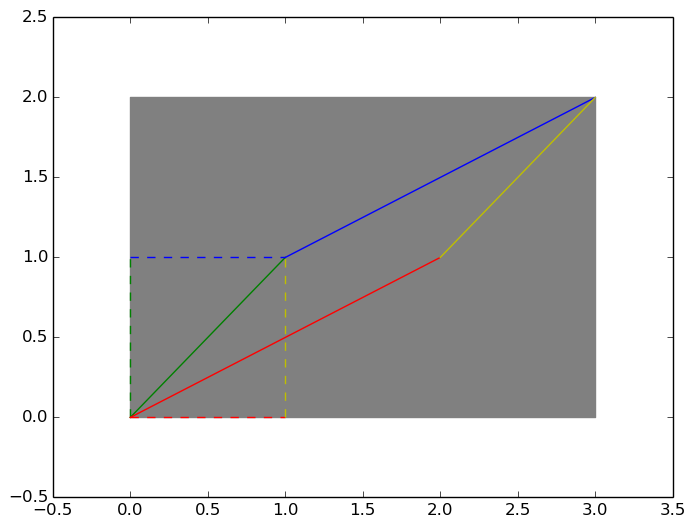

In [19]:
PyPlot.xlim(-0.5,3.5)
PyPlot.ylim(-0.5,2.5);

PyPlot.plot([0,0],[0,1],"--g")
PyPlot.plot([0,1],[0,1],"-g")

PyPlot.plot([0,1],[0,0],"--r")
PyPlot.plot([0,2],[0,1],"-r")

PyPlot.plot([0,1],[1,1],"--b")
PyPlot.plot([1,3],[1,2],"-b")

PyPlot.plot([1,1],[0,1],"--y")
PyPlot.plot([2,3],[1,2],"-y")

PyPlot.fill_between([0,3],0,2,color="gray");

El intervalo multidimensional más pequeño que contiene la imagen es:

In [20]:
[Intervalo(0,3),Intervalo(0,2)]

2-element Array{Intervalo,1}:
 [0e+00,
3e+00]
 [0e+00,
2e+00]

#### (ii) Verifica el resultado con tu código.

In [21]:
inter2d=[Intervalo(0,1),Intervalo(0,1)]

2-element Array{Intervalo,1}:
 [0e+00,
1e+00]
 [0e+00,
1e+00]

In [22]:
mat*inter2d

LoadError: `zero` has no method matching zero(::Type{Any})
while loading In[22], in expression starting on line 1

In [23]:
2*inter2d[1]+1*inter2d[2]
[2,1]⋅inter2d

[0e+00,
3e+00]

In [24]:
1*inter2d[1]+1*inter2d[2]
[1,1]⋅inter2d

[0e+00,
2e+00]

#### (iii) ¿Cuál es el problema que ocurre? ¿Cómo lo podríamos resolver? Impleméntalo.

El problema es que la operación para arreglos abstractos incluye la función zero que no está definida para este caso.
Para resolverlo voy a definir la operación nuevamente

In [25]:
function *(m::Array{Int64,2},x::Array{Intervalo,1})
    y=similar(x)
    for i=1:length(x)
        y[i]=transpose(m)[1+(i-1)*length(x):i*length(x)]⋅(x)
    end
    return y
end        

function *(m::Array{Float64,2},x::Array{Intervalo,1})
    y=similar(x)
    for i=1:length(x)
        y[i]=transpose(m)[1+(i-1)*length(x):i*length(x)]⋅(x)
    end
    return y
end

* (generic function with 132 methods)

In [26]:
@which mat*inter2d

*(m::Array{Int64,2},x::Array{Intervalo,1}) at In[25]:2

In [27]:
mat*inter2d

2-element Array{Intervalo,1}:
 [0e+00,
3e+00]
 [0e+00,
2e+00]

# [5]
#### Haz lo mismo para la imagen del cuadrado unitario bajo la función

\begin{equation}
    \begin{pmatrix} x \\ y \end{pmatrix} \mapsto \begin{pmatrix} 1-ax²+y \\ bx \end{pmatrix}
\end{equation}

#### con $a=1.4$ y $b=0.3$ (el famoso "mapeo de Hénon").

In [28]:
a=14//10
b=3//10
mapeoHenon(x)=[1-a*(x[1])^2+x[2] , b*x[1]]    

mapeoHenon (generic function with 1 method)

In [29]:
mapeoHenon(inter2d)

2-element Array{Intervalo,1}:
 [-4.000000000000000000000000000000000000000000000000000000000000000000000000000138e-01,
2e+00]
 [0e+00,
3.000000000000000000000000000000000000000000000000000000000000000000000000000017e-01] 

Ahora encuentro a mano la imagen

In [39]:
x=([0,0],[0,1/4],[0,1/2],[0,3/4],[0,1])
for i=1:length(x)
    println("$(x[i]) → ",mapeoHenon(x[i]))
end;
println("La recta que une [0,0] y [0,1] se va a una recta que une [1,0] y [2,0]")
println()
x=([0,0],[1/4,0],[1/2,0],[3/4,0],[1,0])
for i=1:length(x)
    println("$(x[i]) → ",mapeoHenon(x[i]))
end;
println("La recta que une [0,0] y [1,0] se va a una recta que une [1,0] y [-2/5,0.3]")
println()
x=([0,1],[1/4,1],[1/2,1],[3/4,1],[1,1])
for i=1:length(x)
    println("$(x[i]) → ",mapeoHenon(x[i]))
end;
println("La recta que une [0,1] y [1,1] se va a una recta que une [2,0] y [3/5,3/10]")
println()
x=([1,0],[1,1/4],[1,1/2],[1,3/4],[1,1])
for i=1:length(x)
    println("$(x[i]) → ",mapeoHenon(x[i]))
end;
println("La recta que une [1,0] y [1,1] se va a una recta que une [-2/5,3/10] y [3/5,3/10]")

[0,0] → Rational{Int64}[1//1,0//1]
[0.0,0.25] → [1.25,0.0]
[0.0,0.5] → [1.5,0.0]
[0.0,0.75] → [1.75,0.0]
[0,1] → Rational{Int64}[2//1,0//1]
La recta que une [0,0] y [0,1] se va a una recta que une [1,0] y [2,0]

[0,0] → Rational{Int64}[1//1,0//1]
[0.25,0.0] → [0.9125,0.075]
[0.5,0.0] → [0.65,0.15]
[0.75,0.0] → [0.21250000000000002,0.22499999999999998]
[1,0] → Rational{Int64}[-2//5,3//10]
La recta que une [0,0] y [1,0] se va a una recta que une [1,0] y [-2/5,0.3]

[0,1] → Rational{Int64}[2//1,0//1]
[0.25,1.0] → [1.9125,0.075]
[0.5,1.0] → [1.65,0.15]
[0.75,1.0] → [1.2125,0.22499999999999998]
[1,1] → Rational{Int64}[3//5,3//10]
La recta que une [0,1] y [1,1] se va a una recta que une [2,0] y [3/5,3/10]

[1,0] → Rational{Int64}[-2//5,3//10]
[1.0,0.25] → [-0.1499999999999999,0.3]
[1.0,0.5] → [0.10000000000000009,0.3]
[1.0,0.75] → [0.3500000000000001,0.3]
[1,1] → Rational{Int64}[3//5,3//10]
La recta que une [1,0] y [1,1] se va a una recta que une [-2/5,3/10] y [3/5,3/10]


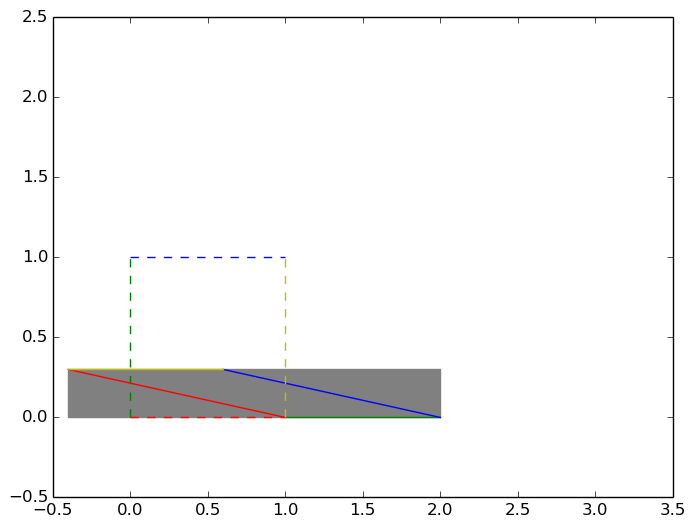

In [41]:
PyPlot.xlim(-0.5,3.5)
PyPlot.ylim(-0.5,2.5);

PyPlot.plot([0,0],[0,1],"--g")
PyPlot.plot([1,2],[0,0],"-g")

PyPlot.plot([0,1],[0,0],"--r")
PyPlot.plot([1,-2//5],[0,3//10],"-r")

PyPlot.plot([0,1],[1,1],"--b")
PyPlot.plot([2,3//5],[0,3//10],"-b")

PyPlot.plot([1,1],[0,1],"--y")
PyPlot.plot([-2//5,3//5],[3//10,3//10],"-y")

PyPlot.fill_between([-0.4,2],0,0.3,color="gray");

Nótese que el cuadro gris es el calculado con intervalos, por lo que vemos que el resultado real SÍ está contenido en este cálculo